In [2]:
import numpy as np
import matplotlib.pyplot as plt

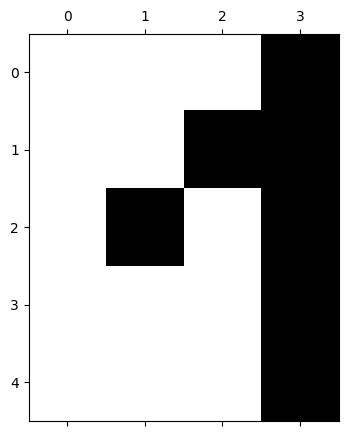

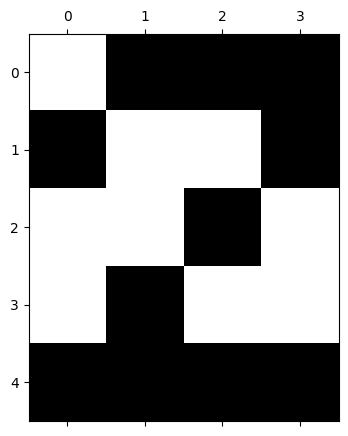

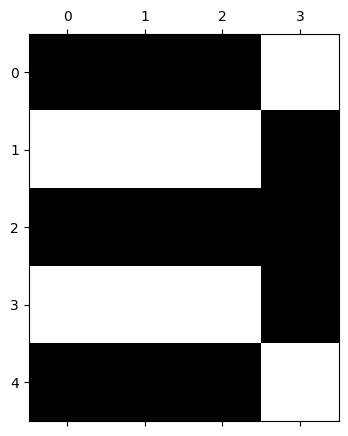

In [3]:
patterns = [
    np.array([
        [0, 0, 0, 1],  
        [0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]
    ]),
    np.array([
        [0, 1, 1, 1],  
        [1, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 1, 1, 1]
    ]),
    np.array([
        [1, 1, 1, 0],  
        [0, 0, 0, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 1],
        [1, 1, 1, 0]
    ])
]

for p in patterns:
    plt.matshow(p, cmap='gray_r')

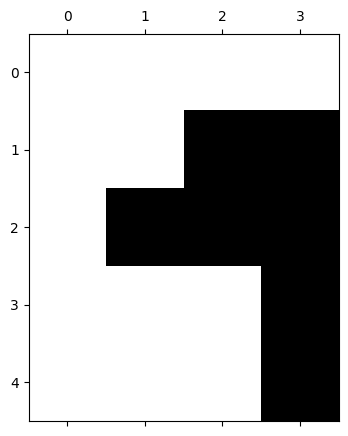

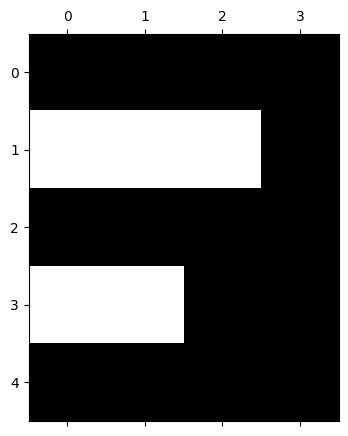

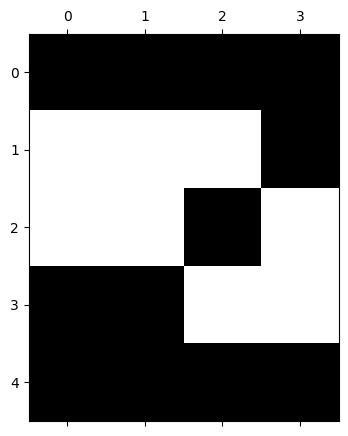

In [4]:
tests = [
    np.array([
        [0, 0, 0, 0],  
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]
    ]),
    np.array([
        [1, 1, 1, 1],  
        [0, 0, 0, 1],
        [1, 1, 1, 1],
        [0, 0, 1, 1],
        [1, 1, 1, 1]
    ]),
    np.array([
        [1, 1, 1, 1],  
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [1, 1, 0, 0],
        [1, 1, 1, 1]
    ])
]

for t in tests:
    plt.matshow(t, cmap='gray_r')

In [5]:
def miara_niepodobienstwa(BA, BB):
    miara = 0
    for (pay, pax), val_ba in np.ndenumerate(BA):
        if val_ba != 1:
            continue
            
        old_min = np.inf
        for (pby, pbx), val_bb in np.ndenumerate(BB):
            if val_bb != 1:
                continue
            # obliczanie odleglosci
            old_akt = np.sqrt((pax - pbx) ** 2 + (pay - pby) ** 2)
            old_min = min(old_min, old_akt)
        
        miara += old_min
    
    return miara


def miara_poodobienstwa_obustronnego(BA, BB):
    return -(miara_niepodobienstwa(BA, BB) + miara_niepodobienstwa(BB, BA))

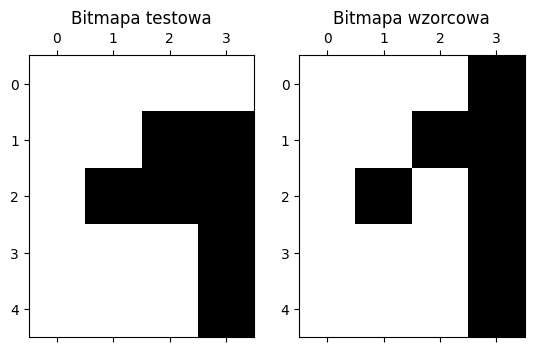

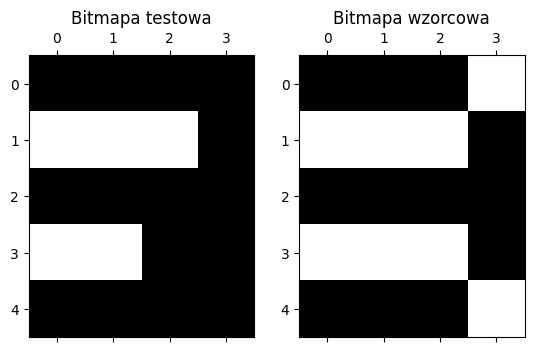

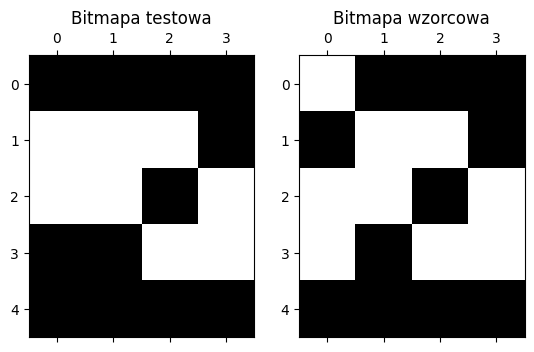

In [6]:
for t in tests:
    miary = []
    for p in patterns:
        miary.append([miara_poodobienstwa_obustronnego(t, p)])

    fig, ax = plt.subplots(1, 2)
    ax[0].matshow(t, cmap='gray_r')
    ax[0].set_title("Bitmapa testowa")
    
    ax[1].matshow(patterns[miary.index(max(miary))], cmap='gray_r')
    ax[1].set_title("Bitmapa wzorcowa")
    plt.show()
    